In [3]:
#%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Full Tutorial -- Docs: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html#training-your-pytorch-model

# Step 1: Define the problem and its datasets

## Problem
- We are going to build PyTroch model for classyfing the CIFAR10 dataset.
- The model architecture is using **LeNet-5**
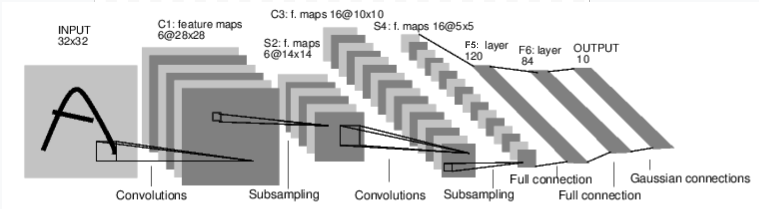

- Layer C1 is a convolutional layer, meaning that it scans the input image for features it learned during training. It outputs a map of where it saw each of its learned features in the image. This “activation map” is downsampled in layer S2.

- Layer C3 is another convolutional layer, this time scanning C1’s activation map for combinations of features. It also puts out an activation map describing the spatial locations of these feature combinations, which is downsampled in layer S4.

- Finally, the fully-connected layers at the end, F5, F6, and OUTPUT, are a classifier that takes the final activation map, and classifies it into one of ten bins representing the 10 digits.

## Datasets
This model will used the dataset that was provided by pytorch, which is CIFAR10
Read more about the dataset:https://www.cs.toronto.edu/~kriz/cifar.html

TL;DR
The dataset is a set of 32x32 color images tiles representing 10 classes of objects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck)

In [13]:
# Transofmations that act to transform the image into tensor and normalize the value
## The value of transforms.Normalize has 2 tuple that act to the rgb values of the images in dataset
## - First tuple = Means
## - Second tuple = Standard deviations
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### The explanation of importing dataset above
- Transforms.Compose is the method that compose all of the transformation which has 2 transformations
    - .ToTensor() is transforming the image from a standard PIL format (or numpy array) into a pPyTorch tensor
    - .Normalize is normalizing the image data. For each channel (Red, Green, and Blue), it subtracts a mean of 0.5 and divides by a standard deviation of 0.5.
- trainload/testloader is the a tool for handling and processing datasets efficiently during training and testing. Remember the loader doesn't understand about the data itself, only for organizing its.

 deer truck horse   car


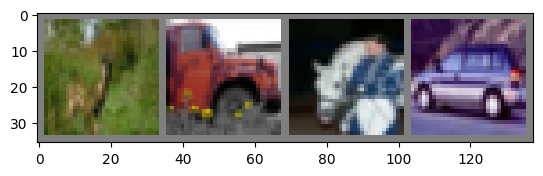

In [20]:
# Show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


# Step 2: Build Model Architecture

In [33]:
# LeNet variant
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 3 input image channel (RGB), 6 output channels, 5x5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.pool = nn.MaxPool2d(2,2)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 from iamge dimension
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = LeNet()

In [34]:
# Optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [40]:
for epoch in range(2):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(train_loader, 0):
    #zero the parameter for each loops to make the optimizer is reset every epoch
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i% 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 1.255
[1,  4000] loss: 1.244
[1,  6000] loss: 1.217
[1,  8000] loss: 1.200
[1, 10000] loss: 1.218
[1, 12000] loss: 1.196
[2,  2000] loss: 1.130
[2,  4000] loss: 1.147
[2,  6000] loss: 1.141
[2,  8000] loss: 1.121
[2, 10000] loss: 1.124
[2, 12000] loss: 1.143
Finished Training


In [41]:
print(outputs)

tensor([[-1.9482, -3.7506,  1.0330,  3.4333,  0.0720,  2.6775,  2.3895,  0.6457,
         -3.1387, -0.6231],
        [ 4.3546,  1.2484,  3.8452, -0.4511, -0.1238, -1.9196,  1.1062, -3.2958,
          1.0695, -0.7596],
        [ 7.5403,  1.1564,  3.4672, -1.7382,  0.2359, -4.3256, -3.0442, -2.6279,
          4.6530,  0.0630],
        [ 1.9385, -1.3008,  2.7053,  0.3646,  1.0649, -0.5675, -0.8382, -1.1267,
         -0.3724, -0.2785]], grad_fn=<AddmmBackward0>)


# Step 3: Get the predictions

In [42]:
# Get the predictions
correct = 0
total = 0
with torch.no_grad():
  for images, data in test_loader:
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %
